In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column
import numpy as np
from pathlib import Path
import os

# import data

In [2]:
path = str(Path(os.getcwd()).parent.absolute())

In [3]:
train_data = pd.read_csv(path + "/data/train.csv")

In [4]:
train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
# Load the dataset
df = train_data.copy()

# Display basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='price_range')
plt.show()

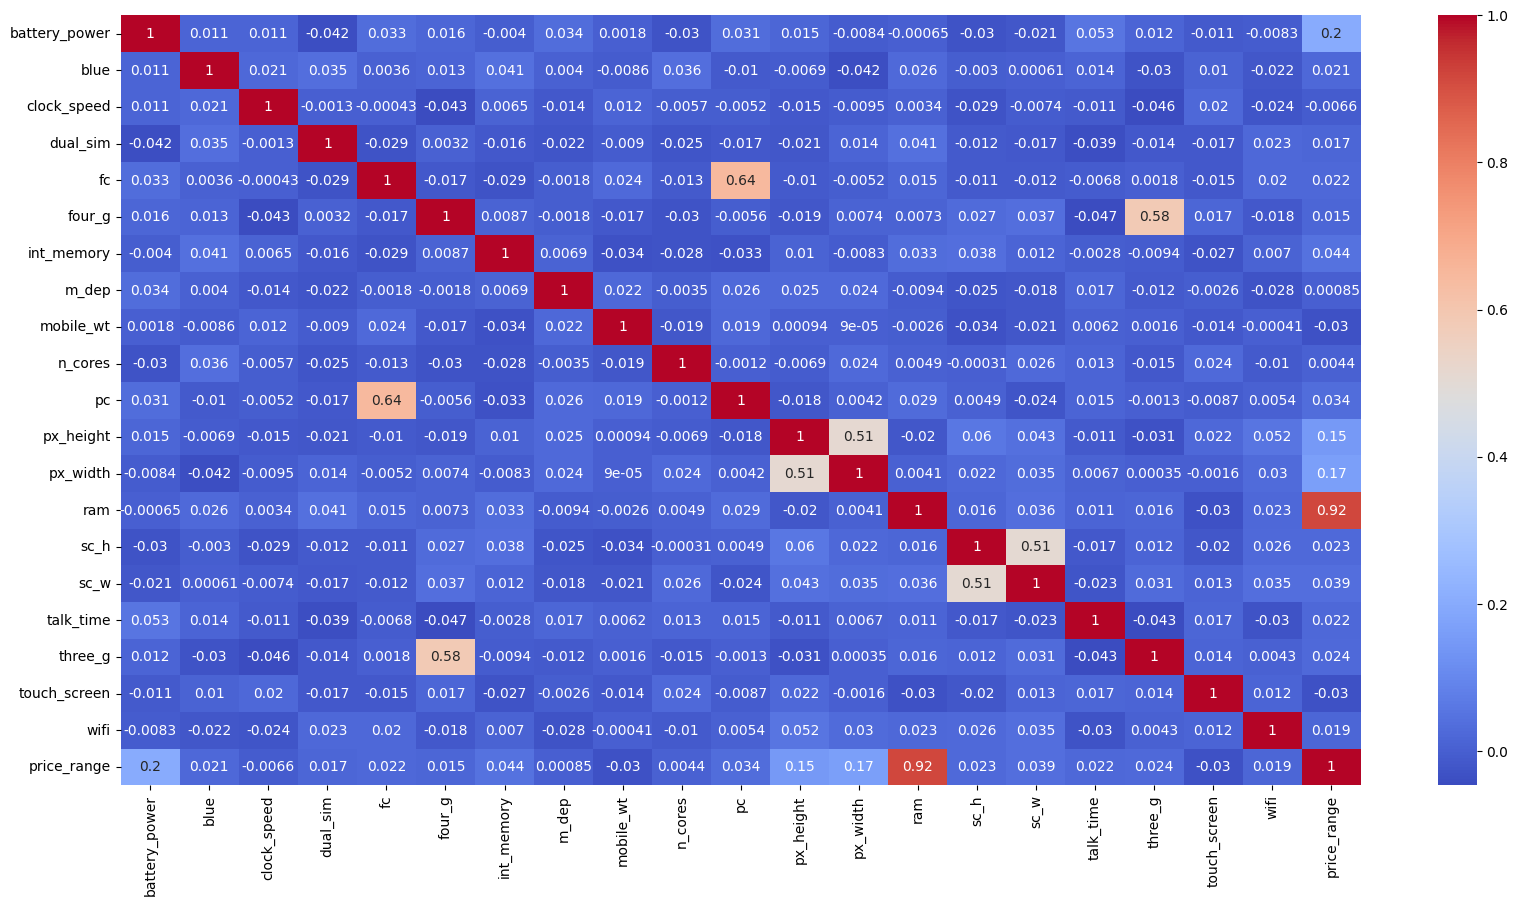

In [8]:
# Correlation matrix
plt.figure(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [10]:
# Bokeh for interactive visualization
output_notebook()

# Scatter plot with Bokeh
source = ColumnDataSource(df)

# Create a new plot with a title and axis labels
p = figure(title="Mobile Price Classification", x_axis_label='ram', y_axis_label='price_range')#, plot_height=400, plot_width=700)

# Add a circle renderer with a size, color, and alpha
p.circle('ram', 'price_range', size=10, color="navy", alpha=0.5, source=source)

# Show the results
show(p)


Loading BokehJS ...

In [25]:
# Bokeh for interactive visualization
output_notebook()

# Scatter plot with Bokeh
source = ColumnDataSource(df)

# Create a new plot with a title and axis labels
p = figure(title="Mobile Price Classification", x_axis_label='battery_power', y_axis_label='price_range')#, plot_height=400, plot_width=700)

# Add a circle renderer with a size, color, and alpha
p.circle('battery_power', 'price_range', size=10, color="navy", alpha=0.5, source=source)

# Show the results
show(p)


Loading BokehJS ...

In [23]:
# Histogram with Bokeh
hist, edges = np.histogram(df['battery_power'], bins=len(df['price_range'].unique()))

p_hist = figure(title="Price Range Distribution", x_axis_label='Price Range', y_axis_label='Count')#, plot_height=400, plot_width=700)
p_hist.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white", alpha=0.5)

# Show the results
show(p_hist)

In [14]:
# Layout with Bokeh
layout = column(p, p_hist)
show(layout)